## Regression Linear

### Let's predict the value of houses in Brooklyn


##### ***Data is extracted from ZIllow.com***

In [1]:
# Libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fastparquet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data 
data = pd.read_parquet("Data/brooklyn_sales.parquet")

# Checkpoint
df = pd.DataFrame(data)

In [3]:
# First 4 rows
df.head(4)

,zpid,Status Type,Status Text,Time On Zillow,Price,Area,Price Per Sqft,Zestimate,Zestimate Price Per Sqft,Rent Zestimate,...,Zipcode,Latitude,Longitude,Broker Name,is zillow owned,Sold Date,Sold Price,Image URL,Detail URL,Search Page URL
0,142972352,FOR_SALE,House for sale,NaN,4299999.0,5056.0,850.0,NaN,NaN,3157.0,...,11228,40.617516,-74.016030,Listing by: Jabour Realty Company,False,NaN,NaN,https://photos.zillowstatic.com/fp/370e173113c...,https://www.zillow.com/homedetails/1135-84th-S...,https://www.zillow.com/homes/for_sale/?searchQ...
1,30695325,FOR_SALE,House for sale,NaN,110000.0,1200.0,92.0,NaN,NaN,3112.0,...,11209,40.631010,-74.028230,Listing by: DiTommaso Real Estate,False,NaN,NaN,https://photos.zillowstatic.com/fp/ee817903ce8...,https://www.zillow.com/homedetails/7520-3rd-Av...,https://www.zillow.com/homes/for_sale/?searchQ...
2,30688987,FOR_SALE,Multi-family home for sale,NaN,1399000.0,2496.0,560.0,1368100.0,548.0,3051.0,...,11219,40.626682,-73.999090,Listing by: Remax Edge,False,NaN,NaN,https://photos.zillowstatic.com/fp/b873f115c1c...,https://www.zillow.com/homedetails/1339-63rd-S...,https://www.zillow.com/homes/for_sale/?searchQ...
3,30695805,FOR_SALE,Multi-family home for sale,NaN,995000.0,2952.0,337.0,1003500.0,340.0,2563.0,...,11209,40.630314,-74.027016,Listing by: Keller Williams Realty Staten Island,False,NaN,NaN,https://photos.zillowstatic.com/fp/8824e0f09db...,https://www.zillow.com/homedetails/334-76th-St...,https://www.zillow.com/homes/for_sale/?searchQ...


In [4]:
# Before we starts, we need to clean the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4195 entries, 0 to 4951
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zpid                      4195 non-null   int64  
 1   Status Type               4195 non-null   object 
 2   Status Text               4195 non-null   object 
 3   Time On Zillow            0 non-null      float64
 4   Price                     4193 non-null   float64
 5   Area                      3431 non-null   float64
 6   Price Per Sqft            3431 non-null   float64
 7   Zestimate                 3054 non-null   float64
 8   Zestimate Price Per Sqft  2524 non-null   float64
 9   Rent Zestimate            3328 non-null   float64
 10  Lot Area                  1037 non-null   float64
 11  Lot Area Unit             1040 non-null   object 
 12  Beds                      3720 non-null   float64
 13  Bathrooms                 4027 non-null   float64
 14  Address      

In [6]:
# Drop the columns with missing values
df = df.drop(columns=['Time On Zillow', 'is zillow owned', 'Zestimate', 'Zestimate Price Per Sqft', 'Rent Zestimate', 'Sold Date', 'Sold Price', 'Broker Name', 'Detail URL', 'Search Page URL'], errors='ignore')

In [8]:
df.isna().sum()

zpid                 0
Status Type          0
Status Text          0
Price                2
Area               764
Price Per Sqft     764
Lot Area          3158
Lot Area Unit     3155
Beds               475
Bathrooms          168
Address              0
Street               0
City                 0
State                0
Zipcode              0
Latitude            49
Longitude           49
Broker Name          9
Image URL            0
dtype: int64

#### **Data Cleaning**

In [12]:
# Drop the row `Lot Area` and `Lot Area Unit`
df.drop(columns=['Lot Area', 'Lot Area Unit'], inplace=True)

# Dropna the row `price`
df = df.dropna(subset=['Price', 'Beds', 'Latitude', 'Longitude'])

# We fill the missing columns with the median
df['Area'] = df['Area'].fillna(df['Area'].median())
df['Price Per Sqft'] = df['Price Per Sqft'].fillna(df['Price Per Sqft'].median())
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].median())

C:\Users\DELL\AppData\Local\Temp\ipykernel_15692\2759493478.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = df['Area'].fillna(df['Area'].median())
C:\Users\DELL\AppData\Local\Temp\ipykernel_15692\2759493478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Per Sqft'] = df['Price Per Sqft'].fillna(df['Price Per Sqft'].median())
C:\Users\DELL\AppData\Local\Temp\ipykernel_15692\2759493478.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [15]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,zpid,Price,Area,Price Per Sqft,Beds,Bathrooms,Zipcode,Latitude,Longitude
count,"3,678.00","3,678.00","3,678.00","3,678.00","3,678.00","3,678.00","3,678.00","3,678.00","3,678.00"
mean,"372,994,541.40","1,508,145.92","2,099.85",782.23,4.23,3.57,"11,222.10",40.65,-73.96
std,"604,354,444.52","1,582,280.74","2,517.71","1,163.91",4.12,22.58,15.35,0.04,0.04
min,"30,566,186.00",1.00,12.00,0.00,1.00,1.00,"11,201.00",40.57,-74.04
25%,"30,721,742.25","699,000.00","1,055.25",486.25,2.00,2.00,"11,212.00",40.61,-73.99
50%,"96,028,320.00","1,150,000.00","1,600.00",661.00,3.00,2.00,"11,221.00",40.64,-73.96
75%,"440,264,913.25","1,799,000.00","2,491.50",906.00,5.00,4.00,"11,233.00",40.68,-73.93
max,"2,146,826,815.00","27,000,000.00","77,674.00","65,750.00",114.00,901.00,"11,414.00",40.74,-73.85


In [ ]:
# Only numeric columns
df = df.select_dtypes(include=[np.number])

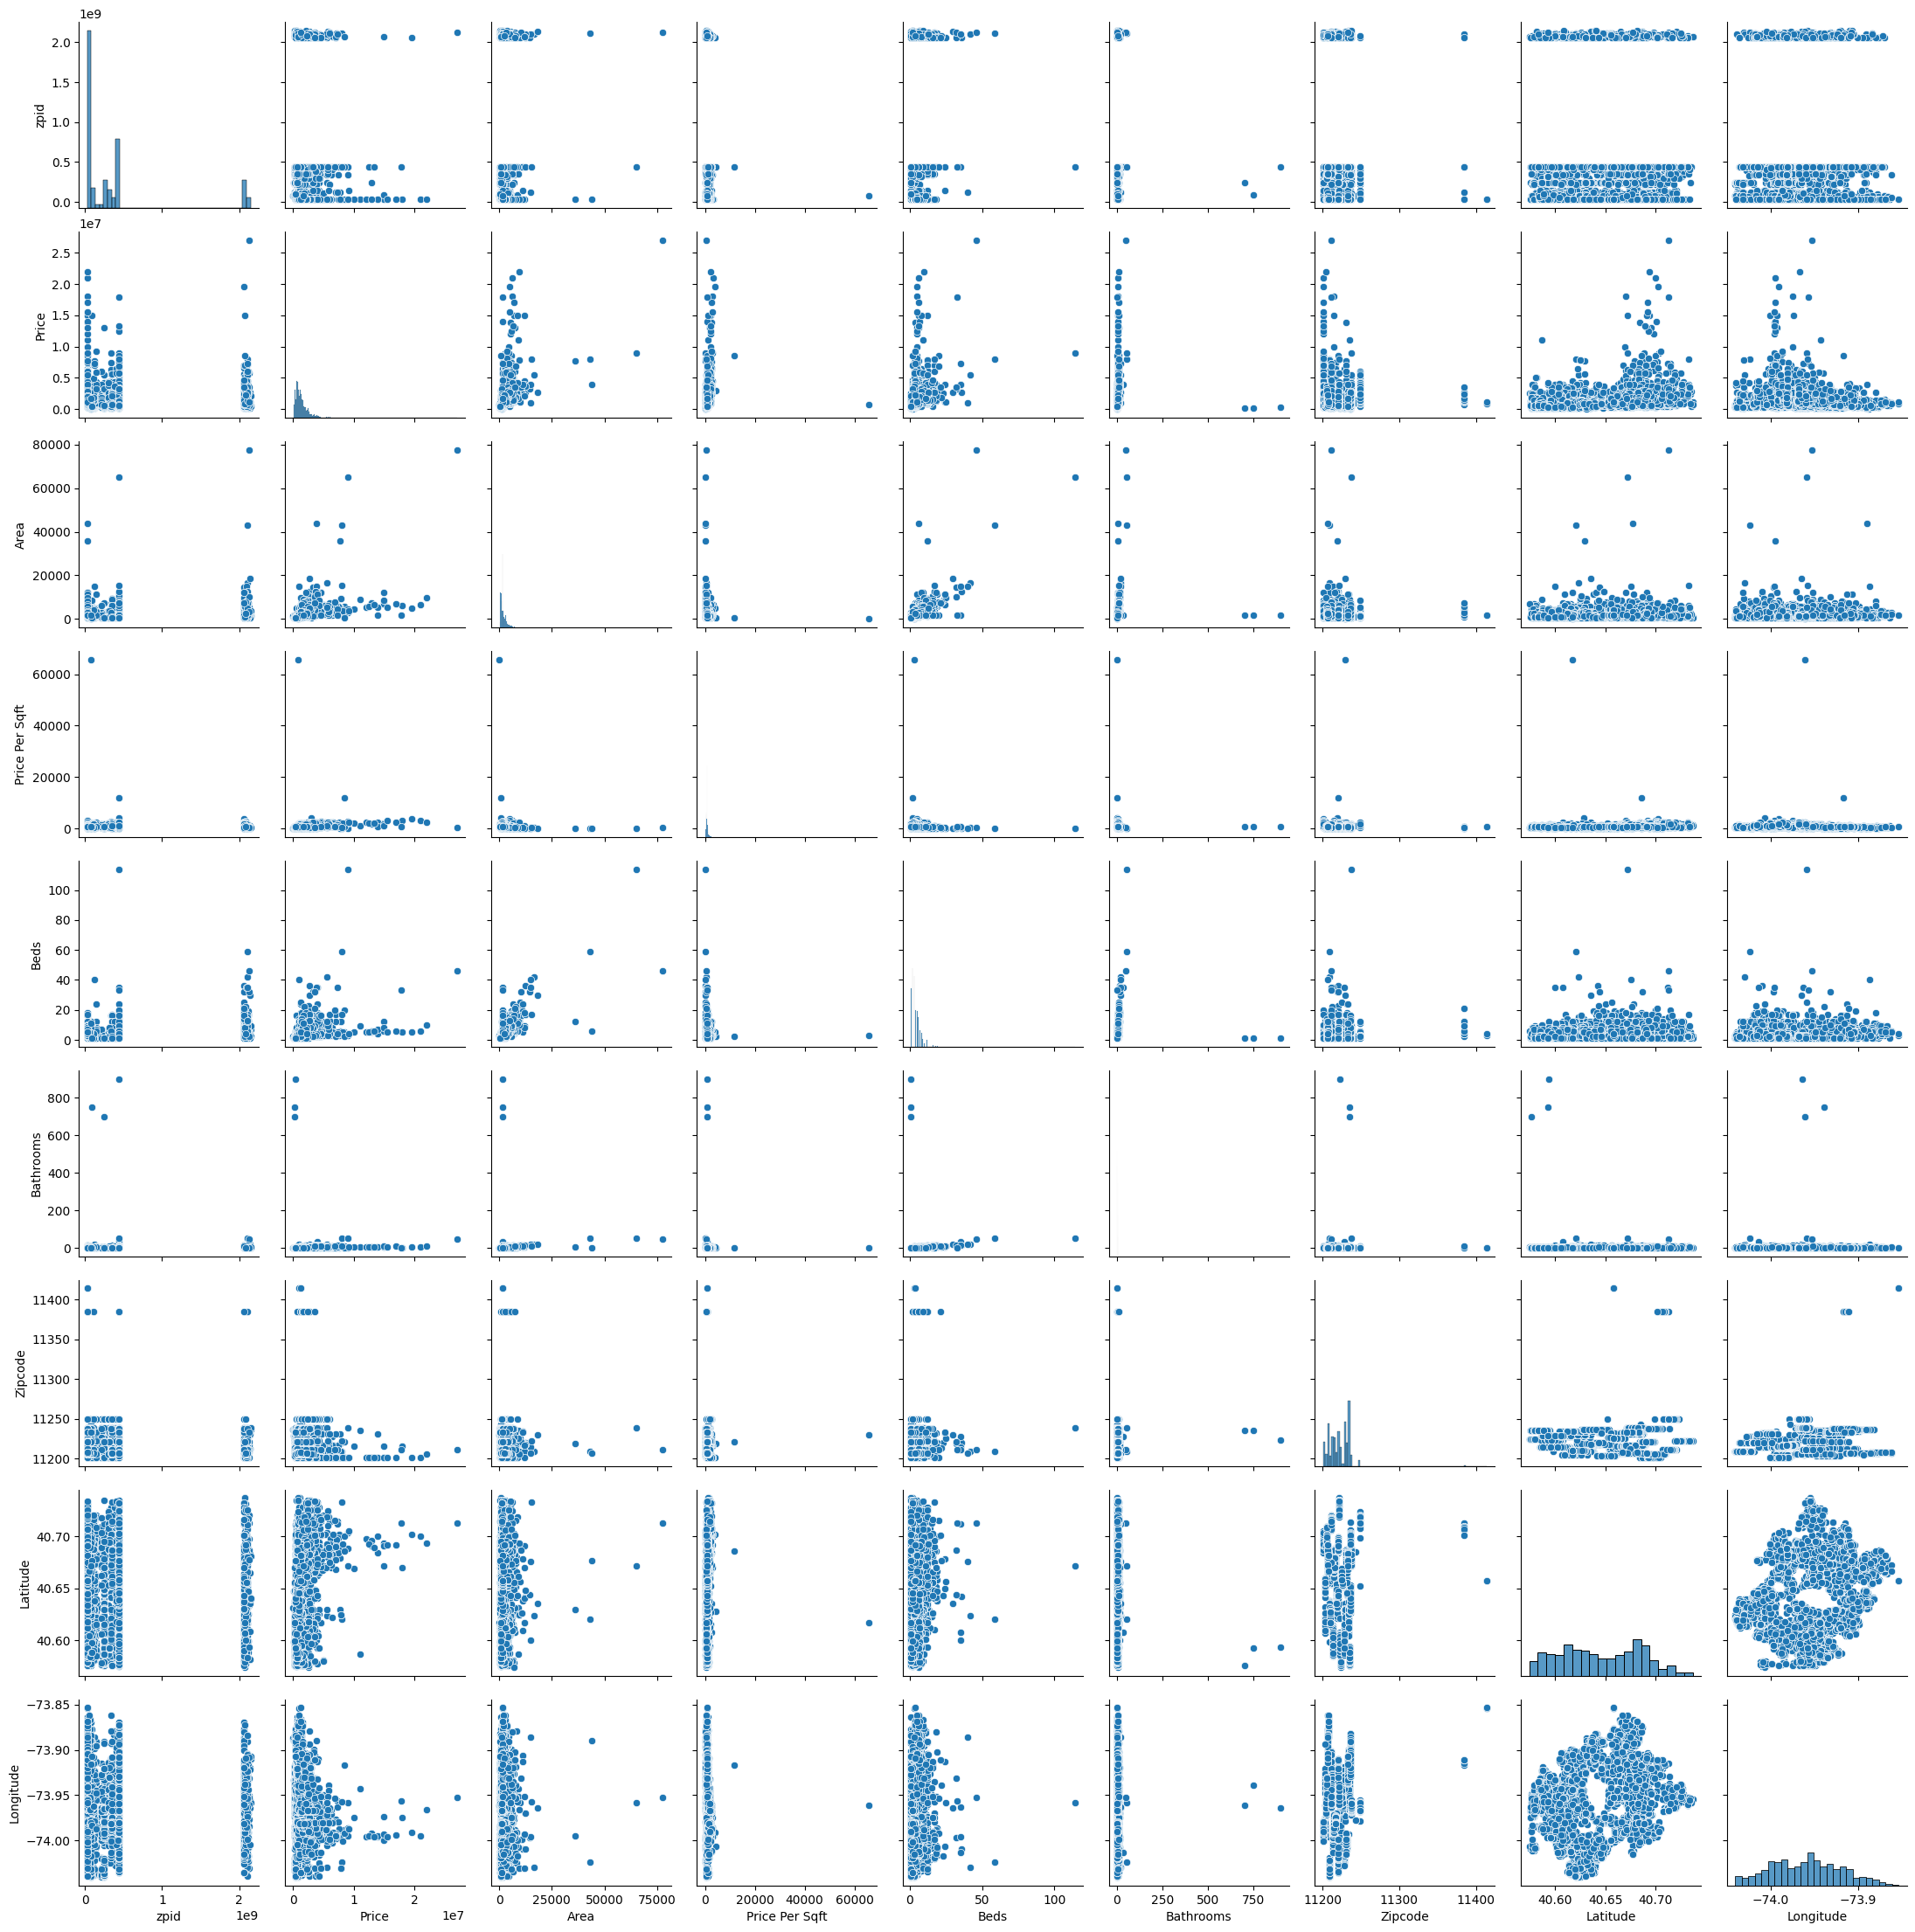

In [20]:
# Visualize the relationships
sns.pairplot(df)
plt.show()

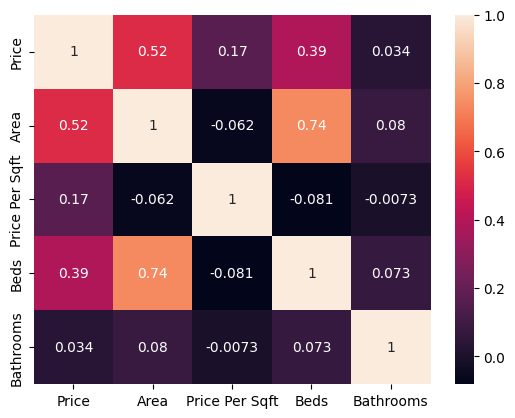

In [21]:
corr =  df[['Price', 'Area', 'Price Per Sqft',
       'Beds', 'Bathrooms']]
# Correlation matrix
corr_matrix = corr.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()